the purpose of this notebook is to project gene essentiality profiles into 2D space using PCA and NMF (non-negative matrix factorization). 

Adrian Jinich 
04/01/2019

In [1]:
import numpy as np
from sklearn import decomposition
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

load dataset for log2FC

In [2]:
data_path = '../../data/Tn_library_log2FC_DASH.xlsx'
df_log2FC = pd.read_excel(data_path)
df_log2FC.shape

(3990, 39)

- get rid of +/- infinities
- make nan's zeros for now: 

In [3]:
df_log2FC.replace([np.inf, -np.inf], np.nan, inplace=True)
df_log2FC.fillna(0, inplace=True)

In [4]:
df_log2FC.columns

Index(['Rv_ID', 'gene_name', '2012_Zhang_log2FC', '2015_Kieser_GI_1_log2FC',
       '2015_Kieser_GI_2_log2FC', '2015_Kieser_GI_3_log2FC',
       '2015_Mendum_log2FC', '2016_Nambi_log2FC', '2017_Xu_1A_log2FC',
       '2017_Xu_1B_log2FC', '2017_Xu_1C_log2FC', '2017_Xu_1D_log2FC',
       '2017_Xu_1E_log2FC', '2018_Carey_1A_log2FC', '2018_Carey_1B_log2FC',
       '2018_Carey_1C_log2FC', '2018_Carey_1D_log2FC', '2018_Carey_1E_log2FC',
       '2018_Carey_1F_log2FC', '2018_Carey_1G_log2FC', '2018_Carey_1H_log2FC',
       '2017B_DeJesus_1A_log2FC', '2017B_DeJesus_1B_log2FC',
       '2017B_DeJesus_1C_log2FC', 'marP_log2FC', 'Rv0950_log2FC',
       'Rv3916c_log2FC', 'Rv0307c_log2FC', 'Rv3717_log2FC', 'ponA1_log2FC',
       'Rv1565c_log2FC', 'Rv3684_log2FC', 'Rv0954_log2FC', 'Rv3811_log2FC',
       'Rv1096_log2FC', 'Rv2680_log2FC', 'Rv1432_log2FC', 'Rv3594_log2FC',
       'Rv3005c_log2FC'],
      dtype='object')

### sanger annotations: 

In [10]:
dir_annotations = '../../data/annotations/'
file_sanger = os.path.join(dir_annotations, 'H37Rv_sanger_roles.xlsx')
df_sanger = pd.read_excel(file_sanger)
df_sanger = df_sanger[['Rv_ID', 'sanger']]

df_sanger['level_1'] = [s.split('.')[0] for s in df_sanger.sanger.values]


sanger_list = list(df_sanger.sanger.values)
sanger_list_level_II = []
for sanger in sanger_list:
    sanger_split = sanger.split('.')
    if len(sanger_split) == 1:
        sanger_list_level_II.append(sanger)
    else:
        sanger_list_level_II.append('.'.join(sanger_split[:2]) )
        
df_sanger['level_2'] = sanger_list_level_II


# df_Rv = df_log2FC[['Rv_ID', 'gene_name']]

# df_sanger_Rv = df_sanger.merge(df_Rv, how = 'right', on = 'Rv_ID')

Why are there some genes missing in the Sanger annotation? 

merge with Sanger

In [11]:
df_log2FC_sanger = df_sanger.merge(df_log2FC, how = 'inner', on = 'Rv_ID')

In [12]:
data_cols = df_log2FC_sanger.columns[5:]
mat_log2FC = df_log2FC_sanger[data_cols].values

# PCA:

In [13]:
pca = decomposition.PCA(n_components=4)

In [14]:
pc = pca.fit_transform(mat_log2FC)

variance explained by each principal component

In [15]:
pca.explained_variance_ratio_

array([0.22176192, 0.11643696, 0.07453992, 0.0658827 ])

In [16]:
pc_df = pd.DataFrame(data = pc , columns = ['PC1', 'PC2', 'PC3', 'PC4'])
pc_df.shape

(3908, 4)

In [17]:
sanger_1 = df_log2FC_sanger.level_1.values
sanger_2 = df_log2FC_sanger.level_2.values

In [18]:
pc_df['sanger_1'] = sanger_1
pc_df['sanger_2'] = sanger_2

Scatter plot of two principal components

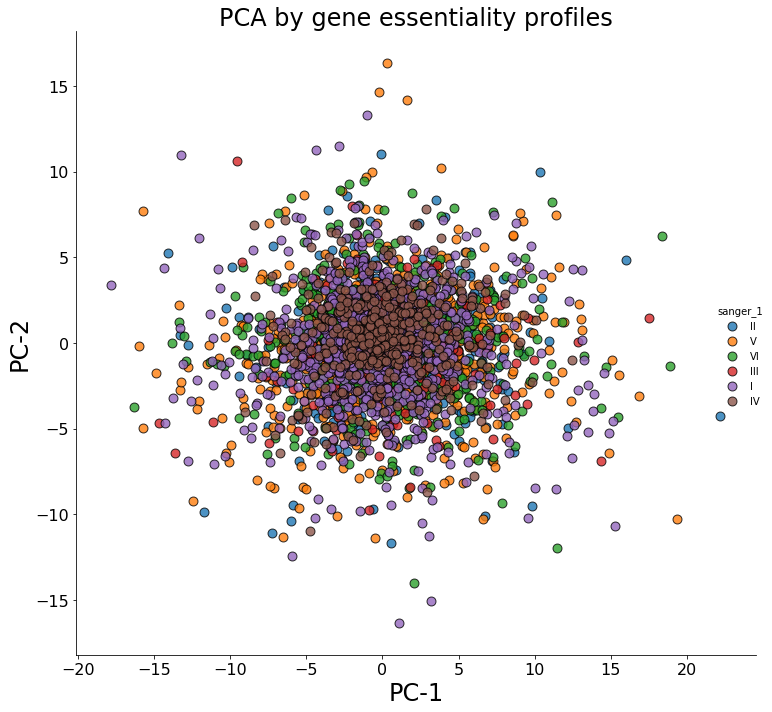

In [19]:
sns.lmplot( x="PC1", y="PC2", data=pc_df, hue = 'sanger_1', fit_reg=False, 
           scatter_kws={"s": 80, 'edgecolor':'k'}, height=10, aspect=1) # specify the point size
xl = plt.xlabel('PC-1', fontsize = 24)
yl = plt.ylabel('PC-2', fontsize = 24)
xt = plt.xticks(fontsize=16)
yt = plt.yticks(fontsize=16)
plt.title('PCA by gene essentiality profiles', fontsize = 24)

plt.tight_layout()
fig_path = '../../figures/genome_visualizations/pca_genes_sanger_1.png'
plt.savefig(fig_path, dpi = 300)

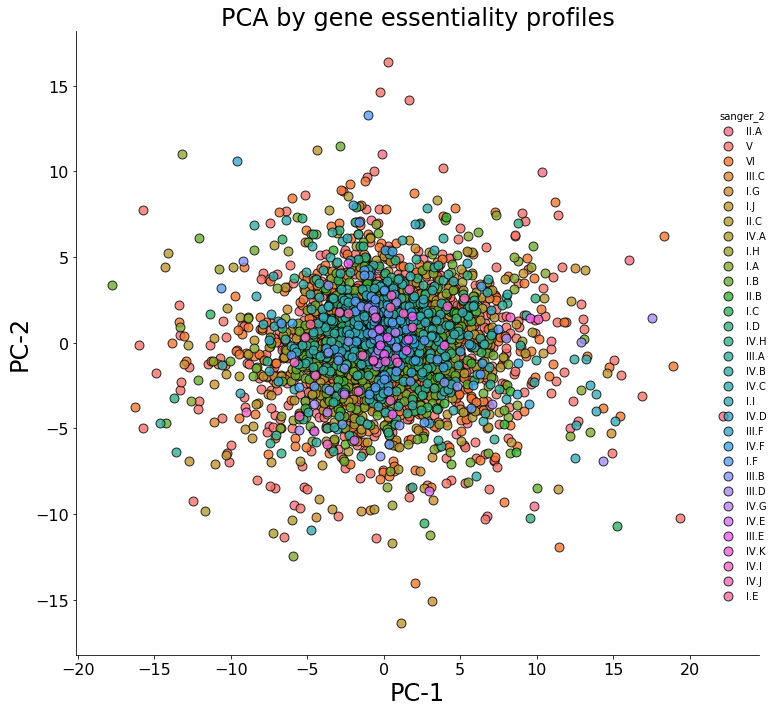

In [20]:
sns.lmplot( x="PC1", y="PC2", data=pc_df, hue = 'sanger_2', fit_reg=False, 
           scatter_kws={"s": 80, 'edgecolor':'k'}, height=10, aspect=1) # specify the point size
xl = plt.xlabel('PC-1', fontsize = 24)
yl = plt.ylabel('PC-2', fontsize = 24)
xt = plt.xticks(fontsize=16)
yt = plt.yticks(fontsize=16)
plt.title('PCA by gene essentiality profiles', fontsize = 24)

plt.tight_layout()
fig_path = '../../figures/genome_visualizations/pca_genes_sanger_2.png'
plt.savefig(fig_path, dpi = 300)

### what about PCA of the transpose matrix? 

In [21]:
mat_log2FC_by_screen = mat_log2FC.transpose()

In [22]:
pca2 = decomposition.PCA(n_components=4)
pc_by_screen = pca2.fit_transform(mat_log2FC_by_screen)

In [23]:
pca2.explained_variance_ratio_

array([0.20484229, 0.12256164, 0.07819974, 0.07577948])

In [24]:
pc_df_2 = pd.DataFrame(data = pc_by_screen , columns = ['PC1', 'PC2', 'PC3', 'PC4'])

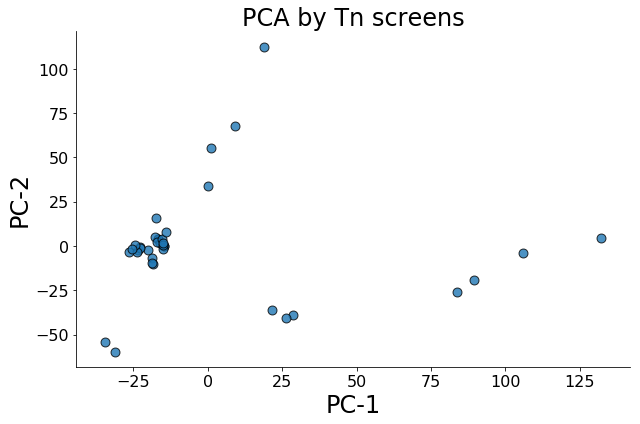

In [25]:
sns.lmplot( x="PC1", y="PC2",data=pc_df_2, fit_reg=False, scatter_kws={"s": 80, 'edgecolor':'k'}, height=6, aspect=1.5) # specify the point size
xl = plt.xlabel('PC-1', fontsize = 24)
yl = plt.ylabel('PC-2', fontsize = 24)
xt = plt.xticks(fontsize=16)
yt = plt.yticks(fontsize=16)
plt.title('PCA by Tn screens', fontsize = 24)
plt.tight_layout()
fig_path = '../../figures/genome_visualizations/pca_2.png'
plt.savefig(fig_path, dpi = 300)

# t-SNE

In [26]:
from sklearn.manifold import TSNE

In [27]:
tn_embedded = TSNE(n_components=2).fit_transform(mat_log2FC)

In [28]:
x = [X[0] for X in tn_embedded]
y = [X[1] for X in tn_embedded]

In [29]:
tsne_df = pd.DataFrame(columns = ['tSNE1', 'tSNE2'])
tsne_df['tSNE1'] = x
tsne_df['tSNE2'] = y
tsne_df['sanger_1'] = sanger_1
tsne_df['sanger_2'] = sanger_2

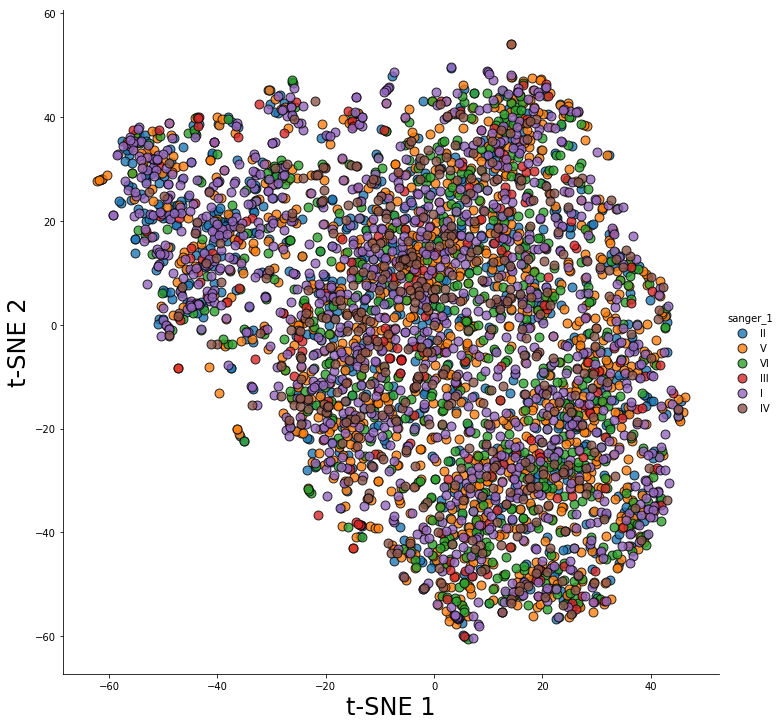

In [30]:
sns.lmplot( x="tSNE1", y="tSNE2", data=tsne_df, hue = 'sanger_1', fit_reg=False, 
           scatter_kws={"s": 80, 'edgecolor':'k'}, height=10, aspect=1) 
plt.xlabel('t-SNE 1', fontsize = 24)
plt.ylabel('t-SNE 2', fontsize = 24)
fig_path = '../../figures/genome_visualizations/tSNE_genes_sanger_1.png'
plt.savefig(fig_path, dpi = 300)

In [ ]:
sns.lmplot( x="tSNE1", y="tSNE2", data=tsne_df, hue = 'sanger_2', fit_reg=False, 
           scatter_kws={"s": 80, 'edgecolor':'k'}, height=10, aspect=1) 
plt.xlabel('t-SNE 1', fontsize = 24)
plt.ylabel('t-SNE 2', fontsize = 24)
fig_path = '../../figures/genome_visualizations/tSNE_genes_sanger_2.png'
plt.savefig(fig_path, dpi = 300)

# non-negative matrix factorization (NMF)